In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
import pandas as pd
import numpy as np
import os

In [2]:
# List of pathogens
pathogens = np.array(["Acinetobacter baumannii", "Candida albicans", "Campylobacter", "Escherichia coli", 
                      "Enterococcus faecium", "Enterobacter", "Helicobacter pylori", "Klebsiella pneumoniae", 
                      "Mycobacterium tuberculosis", "Neisseria gonorrhoeae", "Pseudomonas aeruginosa", 
                      "Plasmodium falciparum", "Staphylococcus aureus", "Schistosoma mansoni", "Streptococcus pneumoniae"])

def get_pathogen_code(pathogen):
    return str(pathogen.split()[0][0] + pathogen.split()[1]).lower() if len(pathogen.split()) > 1 else pathogen.lower()

In [3]:
# Define path to assays
PATH_TO_ASSAYS = os.path.join(".", "..", "output")

# For each pathogen
RESULTS = {}
for pathogen in pathogens:

    # Get pathogen code
    pathogen_code = get_pathogen_code(pathogen)

    # Load assay data
    assay = pd.read_csv(os.path.join(PATH_TO_ASSAYS, pathogen_code, "assays.csv"))
    RESULTS[pathogen_code] = [len(assay), len(assay[assay['cpds'] >= 100])]

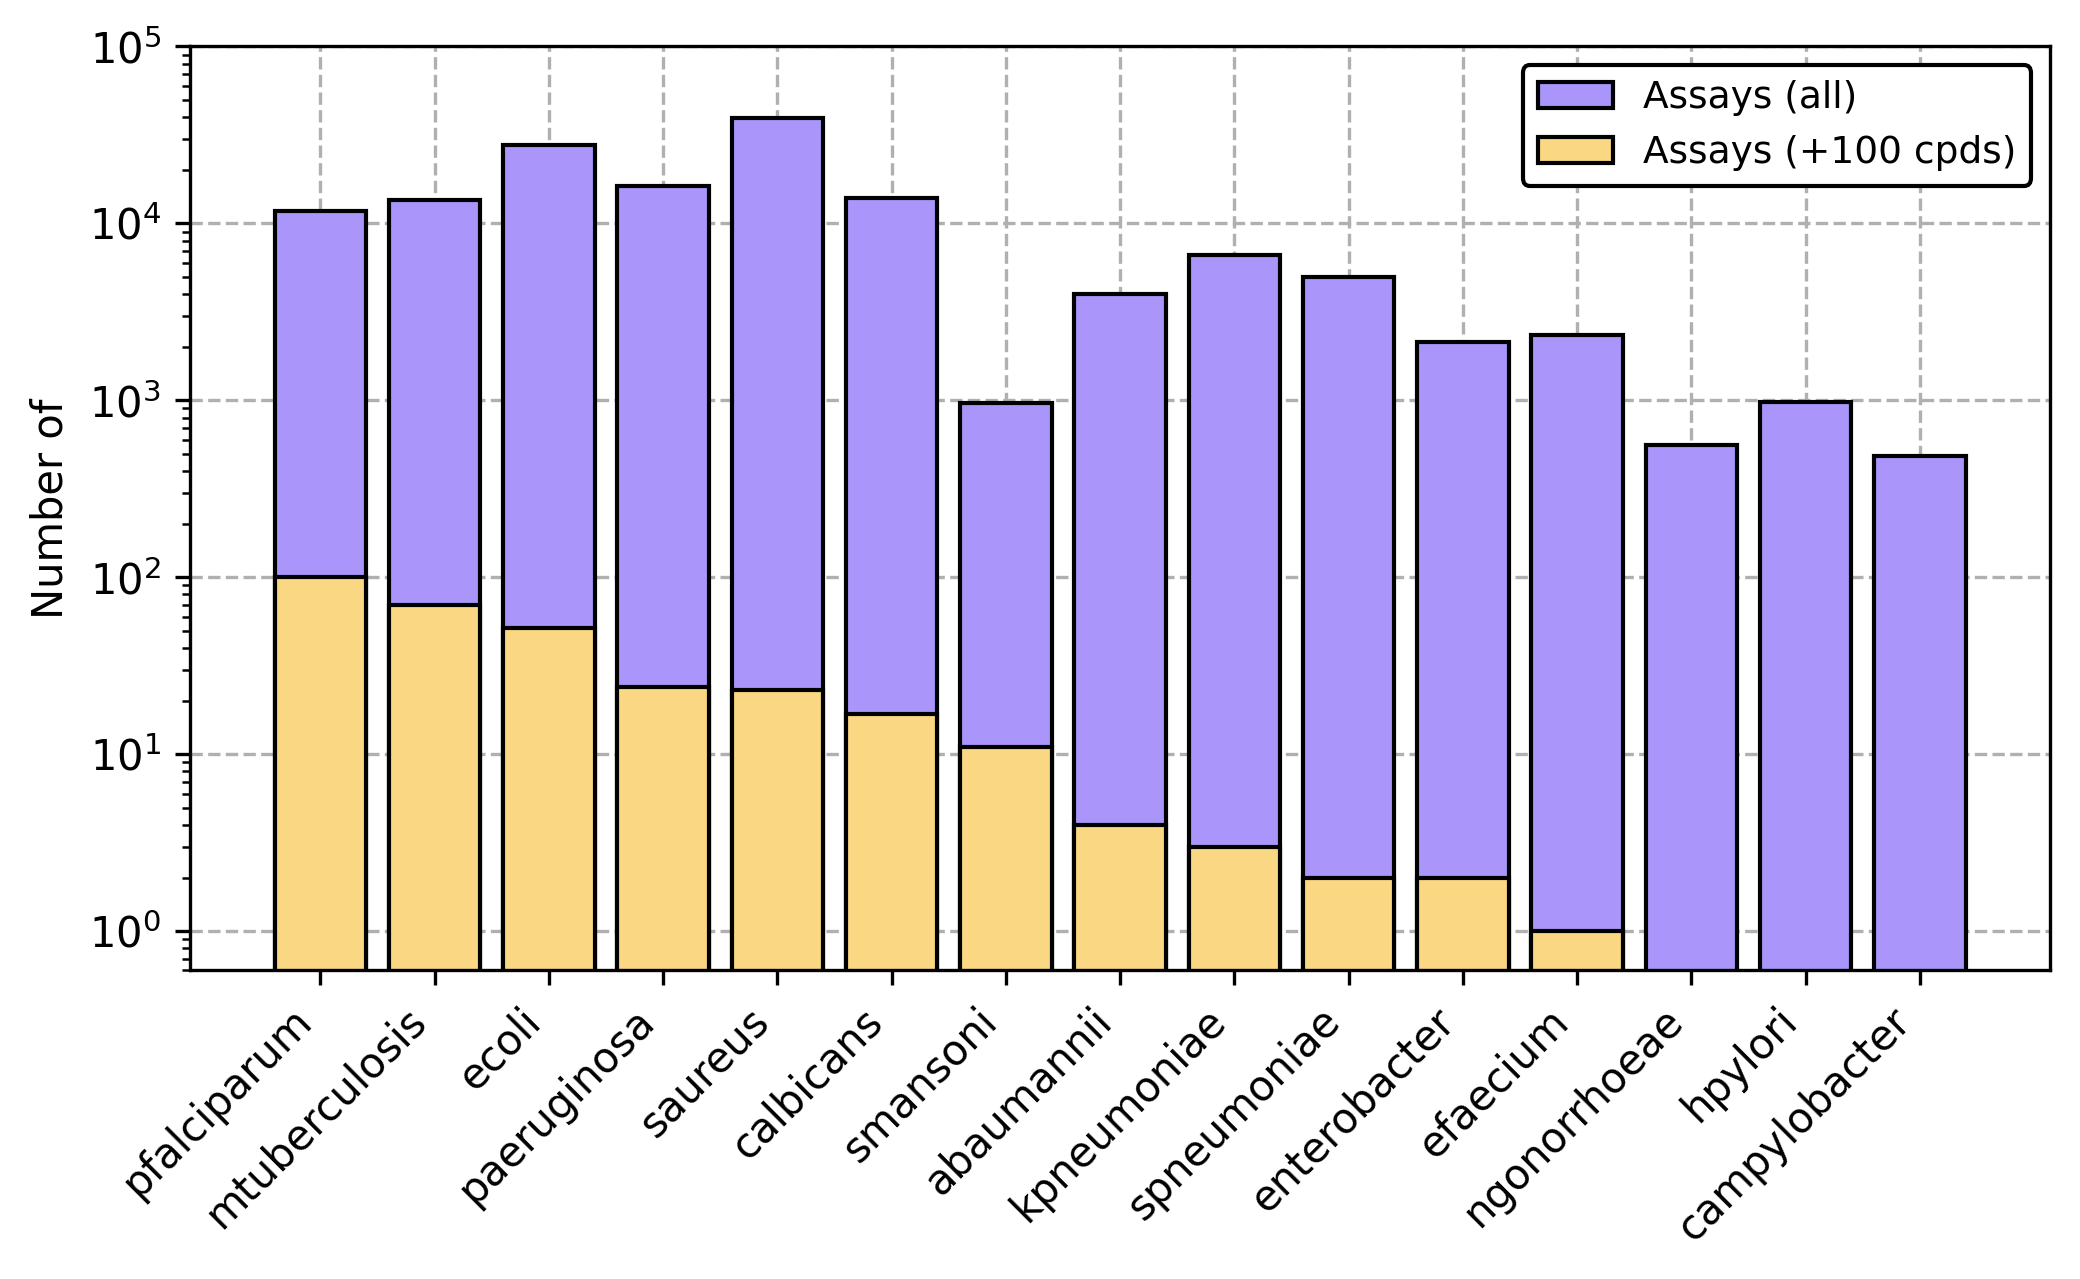

In [4]:
plt.figure(figsize=(8, 4))

x = [i for i in range(len(pathogens))]
inds = np.argsort([RESULTS[get_pathogen_code(i)][1] for i in pathogens])[::-1]
plt.bar(x, [RESULTS[get_pathogen_code(i)][0] for i in pathogens[inds]], zorder=2, ec='k', color="#AA96FA", label='Assays (all)')
plt.bar(x, [RESULTS[get_pathogen_code(i)][1] for i in pathogens[inds]], zorder=2, ec='k', color="#FAD782", label='Assays (+100 cpds)')

plt.ylim([0.6, 10 ** 5])
plt.yscale('log')
plt.ylabel("Number of")
plt.xticks(x, [get_pathogen_code(i) for i in pathogens[inds]], rotation=45, ha='right')
plt.grid(linestyle='--')
plt.legend(loc='upper right', framealpha=1, edgecolor='k', prop={'size': 9})
plt.show()